In [226]:
!git -C /usr/local/Homebrew/Library/Taps/homebrew/homebrew-core fetch --unshallow


remote: Enumerating objects: 727731, done.
remote: Counting objects: 100% (727673/727673), done.
remote: Compressing objects: 100% (244552/244552), done.
remote: Total 718003 (delta 478542), reused 709873 (delta 470586), pack-reused 0
Receiving objects: 100% (718003/718003), 286.72 MiB | 2.38 MiB/s, done.
Resolving deltas: 100% (478542/478542), completed with 7515 local objects.
From https://github.com/Homebrew/homebrew-core
   b8a66561fc..c93beb1f4e  master     -> origin/master


In [233]:
!pip3 install xgboost

In [57]:
import pandas as pd, numpy as np, sklearn 
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

In [33]:
df_train = pd.read_csv('train_house.csv')
df_test = pd.read_csv('test_house.csv')




In [6]:
X = df_train[['LotArea', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
            'FireplaceQu', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'PoolQC', 'Fence', 
            'YrSold']]
Y = df_train[['SalePrice']]
np.array(Y)

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [ ]:
X

In [7]:
change_columns = ['KitchenQual', '']

,LotArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,Fence,YrSold
0,8450,856,854,3,1,Gd,Typ,0,NaN,548,TA,0,61,0,NaN,NaN,2008
1,9600,1262,0,3,1,TA,Typ,1,TA,460,TA,298,0,0,NaN,NaN,2007
2,11250,920,866,3,1,Gd,Typ,1,TA,608,TA,0,42,0,NaN,NaN,2008
3,9550,961,756,3,1,Gd,Typ,1,Gd,642,TA,0,35,0,NaN,NaN,2006
4,14260,1145,1053,4,1,Gd,Typ,1,TA,836,TA,192,84,0,NaN,NaN,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,953,694,3,1,TA,Typ,1,TA,460,TA,0,40,0,NaN,NaN,2007
1456,13175,2073,0,3,1,TA,Min1,2,TA,500,TA,349,0,0,NaN,MnPrv,2010
1457,9042,1188,1152,4,1,Gd,Typ,2,Gd,252,TA,0,60,0,NaN,GdPrv,2010
1458,9717,1078,0,2,1,Gd,Typ,0,NaN,240,TA,366,0,0,NaN,NaN,2010


In [139]:
#X.Fence = X.Fence.astype("category").cat.codes
y = np.array(Y).reshape(1460, )
y.shape

(1460,)

In [238]:
clf = xg.XGBRegressor()
lasso = linear_model.Lasso()
clf.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
X_test = df_test[['LotArea', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
            'FireplaceQu', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'PoolQC', 'Fence', 
            'YrSold']]


In [181]:
X_test['GarageArea'] = X_test['GarageArea'].fillna(X_test['GarageArea'].median())
X_test.isna().sum()

<ipython-input-181-e94249f10c05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageArea'] = X_test['GarageArea'].fillna(X_test['GarageArea'].median())


LotArea         0
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageArea      0
GarageQual      0
WoodDeckSF      0
OpenPorchSF     0
PoolArea        0
PoolQC          0
Fence           0
YrSold          0
dtype: int64

In [176]:
X_test.GarageQual = X_test.GarageQual.astype("category").cat.codes

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [239]:
pred = clf.predict(X_test)
pred.shape
pred_df = pd.DataFrame(pred, columns = ['SalePrice'])
pred_df['Id'] = df_test['Id']
pred_df = pred_df[['Id', 'SalePrice']]

In [240]:
pred_df.to_csv('out.csv', index=False)  

In [241]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f out.csv -m "Message"

100%|██████████████████████████████████████| 21.2k/21.2k [00:03<00:00, 7.05kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


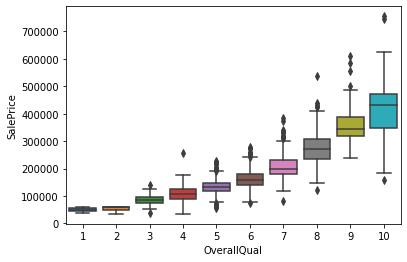

In [10]:
x1 = df_train.OverallQual
x2 = df_train.SalePrice
dat = pd.concat([x1, x2], axis = 1)
sns.boxplot(data = dat, x = "OverallQual", y = "SalePrice")
df_train

(-0.5, 111.5, 0.0, 800000.0)

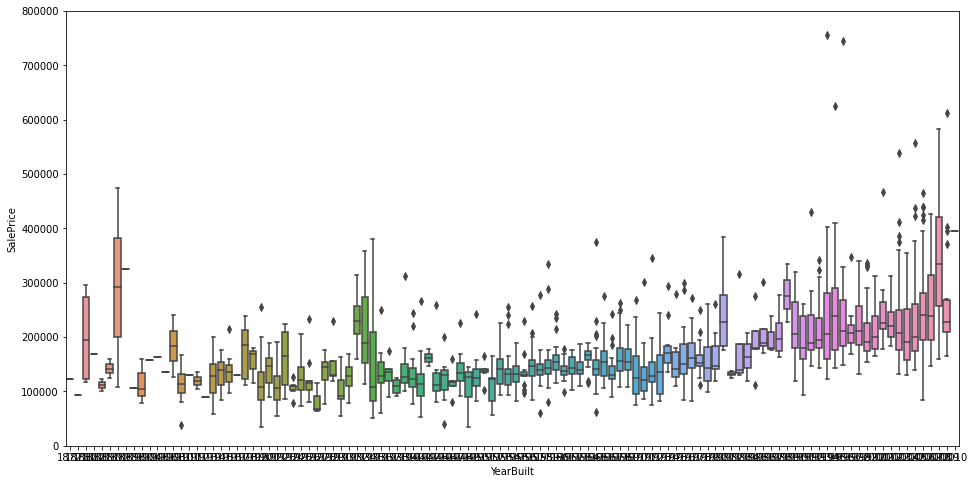

In [8]:
#sns.scatterplot(data = df_train, x = 'GrLivArea', y = 'SalePrice')
x1 = df_train["SalePrice"]
x2 = df_train["YearBuilt"]
f, ax = plt.subplots(figsize=(16, 8))
dat = pd.concat([x1, x2], axis = 1)
fig = sns.boxplot(data = dat, x = "YearBuilt", y = "SalePrice")
fig.axis(ymin=0, ymax=800000)


<AxesSubplot:>

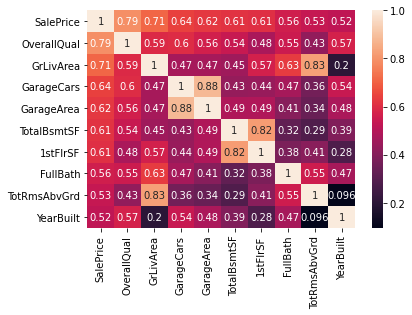

In [9]:
corrmat = df_train.corr()
cols = corrmat.nlargest(10, "SalePrice")['SalePrice'].index
c = df_train[cols].corr()
sns.heatmap(c, annot = True)

In [183]:
df_train = pd.read_csv('train_house.csv')
total = df_train.isna().sum().sort_values(ascending = False)
percent = (df_train.isna().sum() / df_train.shape[0]).sort_values(ascending = False)
miss_data = pd.concat([total,percent], axis = 1, keys=['Total', 'Percent'])
miss_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [184]:
df_train = df_train.drop((miss_data[miss_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [38]:
df_train.isnull().sum().max()

0

In [185]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [186]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = df_train[cols]
X


,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,208500,7,1710,2,856,2,2003
1,181500,6,1262,2,1262,2,1976
2,223500,7,1786,2,920,2,2001
3,140000,7,1717,3,756,1,1915
4,250000,8,2198,3,1145,2,2000
...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,2,1999
1456,210000,6,2073,2,1542,2,1978
1457,266500,7,2340,1,1152,2,1941
1458,142125,5,1078,1,1078,1,1950


In [58]:
#With huber loss that makes it robust to outliers
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor()

model_lgb = lgb.LGBMRegressor()

In [187]:
Y = X['SalePrice']
y = Y.tolist()

In [67]:
cross_val_score(GBoost, X, y, cv = 3)

array([0.84174588, 0.87136807, 0.85464621])

In [68]:
cross_val_score(model_xgb, X, y, cv = 3)

array([0.81931677, 0.86669298, 0.8596353 ])

In [168]:
cross_val_score(model_lgb, X, y1, cv = 3)

array([0.89200535, 0.86842136, 0.879109  ])

In [72]:
j1 = np.array([0.84174588, 0.87136807, 0.85464621]).mean()
j2 = np.array([0.81931677, 0.86669298, 0.8596353 ]).mean()
j3 = np.array([0.85459713, 0.85602375, 0.86081891]).mean()
j1, j2, j3

(0.8559200533333332, 0.8485483500000001, 0.8571465966666666)

In [177]:
df_test = pd.read_csv('test_house.csv')
df_test = df_test.drop((miss_data[miss_data['Total'] > 1]).index, 1)
df_test = df_test.drop(df_test.loc[df_test['Electrical'].isnull()].index)

In [179]:
cols2 = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

df_test = df_test[cols2]
df_test = df_test.fillna(0)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,7,-0.361169,2,856,2,2003
1,6,-0.391729,2,1262,2,1976
2,7,-0.357020,2,920,2,2001
3,7,-0.360777,3,756,1,1915
4,8,-0.337925,3,1145,2,2000
...,...,...,...,...,...,...
1455,6,-0.364794,2,953,2,1999
1456,6,-0.343196,2,1542,2,1978
1457,7,-0.332384,1,1152,2,1941
1458,5,-0.408767,1,1078,1,1950


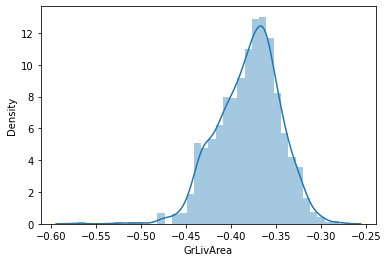

In [211]:
df_test
y = np.array(y)
y.shape
y1 = np.log1p(y)
X = pd.get_dummies(X)
y1 = np.log(y)
y1

X['GrLivArea'] = np.log(X['GrLivArea'])
sns.distplot(X['GrLivArea'])
X

In [215]:
model_lgb.fit(X, y1)
lgb_pred = np.exp(model_lgb.predict(df_test))

array([122836.63621874, 149375.49679827, 157177.63827793, ...,
       142516.02148526, 112057.19110071, 232528.63265485])

In [196]:
model_xgb.fit(X, y1)
xgb_pred = model_xgb.predict(df_test)

In [113]:
GBoost.fit(X, y1)
boost_pred = GBoost.predict(df_test)

In [216]:
d = {"Id": df_test54["Id"], "SalePrice": lgb_pred}
df_lgb = pd.DataFrame(d)
df_lgb

,Id,SalePrice
0,1461,185661.328972
1,1462,200788.022579
2,1463,194943.616873
3,1464,241514.326025
4,1465,341519.518348
...,...,...
1454,2915,135076.558129
1455,2916,138704.383325
1456,2917,206585.907754
1457,2918,177162.862738


In [116]:
d2 = {"Id": df_test54["Id"], "SalePrice": xgb_pred}
df_xgb = pd.DataFrame(d2)
df_xgb

,Id,SalePrice
0,1461,122549.710938
1,1462,148132.593750
2,1463,177292.156250
3,1464,178887.359375
4,1465,210722.171875
...,...,...
1454,2915,79897.382812
1455,2916,82102.773438
1456,2917,149487.093750
1457,2918,106881.351562


In [118]:
d3 = {"Id": df_test54["Id"], "SalePrice": boost_pred}
df_boost = pd.DataFrame(d3)
df_boost

,Id,SalePrice
0,1461,123926.918619
1,1462,156359.710439
2,1463,180059.989016
3,1464,178549.116491
4,1465,190569.029533
...,...,...
1454,2915,77301.280737
1455,2916,85685.248764
1456,2917,148838.726043
1457,2918,110617.089265


In [219]:
df_lgb.to_csv('lgb.csv', index = False)

In [124]:
df_xgb.to_csv('xgb.csv', index = False)

In [126]:
df_boost.to_csv('boost.csv', index = False)

In [220]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f lgb.csv -m "Message"

100%|██████████████████████████████████████| 33.6k/33.6k [00:02<00:00, 14.0kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [167]:
df_train = pd.read_csv('train_house.csv')
df_test = pd.read_csv('test_house.csv')
#new_train = pd.get_dummies(df_train)
#new_test = pd.get_dummies(df_test)
df_test = df_test.fillna(0)
df_train = df_train.fillna(0)
X = df_train.drop('SalePrice', axis = 1)
y = df_train['SalePrice'].tolist()
X = pd.get_dummies(X)
df_test = pd.get_dummies(df_test)
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
#sns.distplot(df_train['SalePrice'], color="b")
df_train['SalePrice']
y1 = np.log1p(y)


(array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
        11.86446927, 11.90159023]),
 [208500,
  181500,
  223500,
  140000,
  250000,
  143000,
  307000,
  200000,
  129900,
  118000,
  129500,
  345000,
  144000,
  279500,
  157000,
  132000,
  149000,
  90000,
  159000,
  139000,
  325300,
  139400,
  230000,
  129900,
  154000,
  256300,
  134800,
  306000,
  207500,
  68500,
  40000,
  149350,
  179900,
  165500,
  277500,
  309000,
  145000,
  153000,
  109000,
  82000,
  160000,
  170000,
  144000,
  130250,
  141000,
  319900,
  239686,
  249700,
  113000,
  127000,
  177000,
  114500,
  110000,
  385000,
  130000,
  180500,
  172500,
  196500,
  438780,
  124900,
  158000,
  101000,
  202500,
  140000,
  219500,
  317000,
  180000,
  226000,
  80000,
  225000,
  244000,
  129500,
  185000,
  144900,
  107400,
  91000,
  135750,
  127000,
  136500,
  110000,
  193500,
  153500,
  245000,
  126500,
  168500,
  260000,
  174000,
  164500,
  85000,
  123600,
  1099